# Load modules and QuakeQuery

In [1]:
import numpy as np
import pandas

import logging
import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm

%matplotlib inline
plt.rcParams['font.size'] = 16

logging.basicConfig()

In [2]:
from quakes import QuakeQuery

In [3]:
# Location of LNGS surface lab according to google maps
lab_lat, lab_lon = 42.4220938, 13.51519  # degrees

# maximum radius of events to query
event_radius = 50000  #m

In [4]:
quakes = QuakeQuery(lab_lat, lab_lon, event_radius)  #, loglevel)

INFO:QuakeQuery:Initialized at 42.42 lat, 13.52 lon with 50000m radius


# Prepare plot function

In [5]:
def plot_data(data, save_as=""):
    plt.figure(figsize=(35, 12))
    plt.scatter(data['DateTime'].values,
                data['Distance'].values/1000,
                s=(3.5 * data['Magnitude'].values)**2,
                c=data['Magnitude'].values,
                lw=0, alpha=0.85)
    p = plt.colorbar()

    p.set_label('Magnitude')
    plt.ylabel('Distance from surface lab [km]')
    plt.xlabel('Time (UTC)')
    plt.xlim(start_date, end_date)
    plt.ylim(0, event_radius / 1000)
    plt.title('Earthquakes with magnitude %.1f+ within %dkm radius of LNGS' % (min_mag, event_radius / 1000))

    if not save_as == "":
        plt.savefig(save_as, dpi=150)

    plt.show()

# Get predefined time range

In [6]:
print(list(quakes.quakes.keys()))

['january_2017', 'october_2016', 'august_2016', '2009']


In [7]:
data = quakes.query_predefined('2009')

INFO:QuakeQuery:Queried 1714 events


In [8]:
start_date, end_date = quakes.quakes['2009']
min_mag = 2

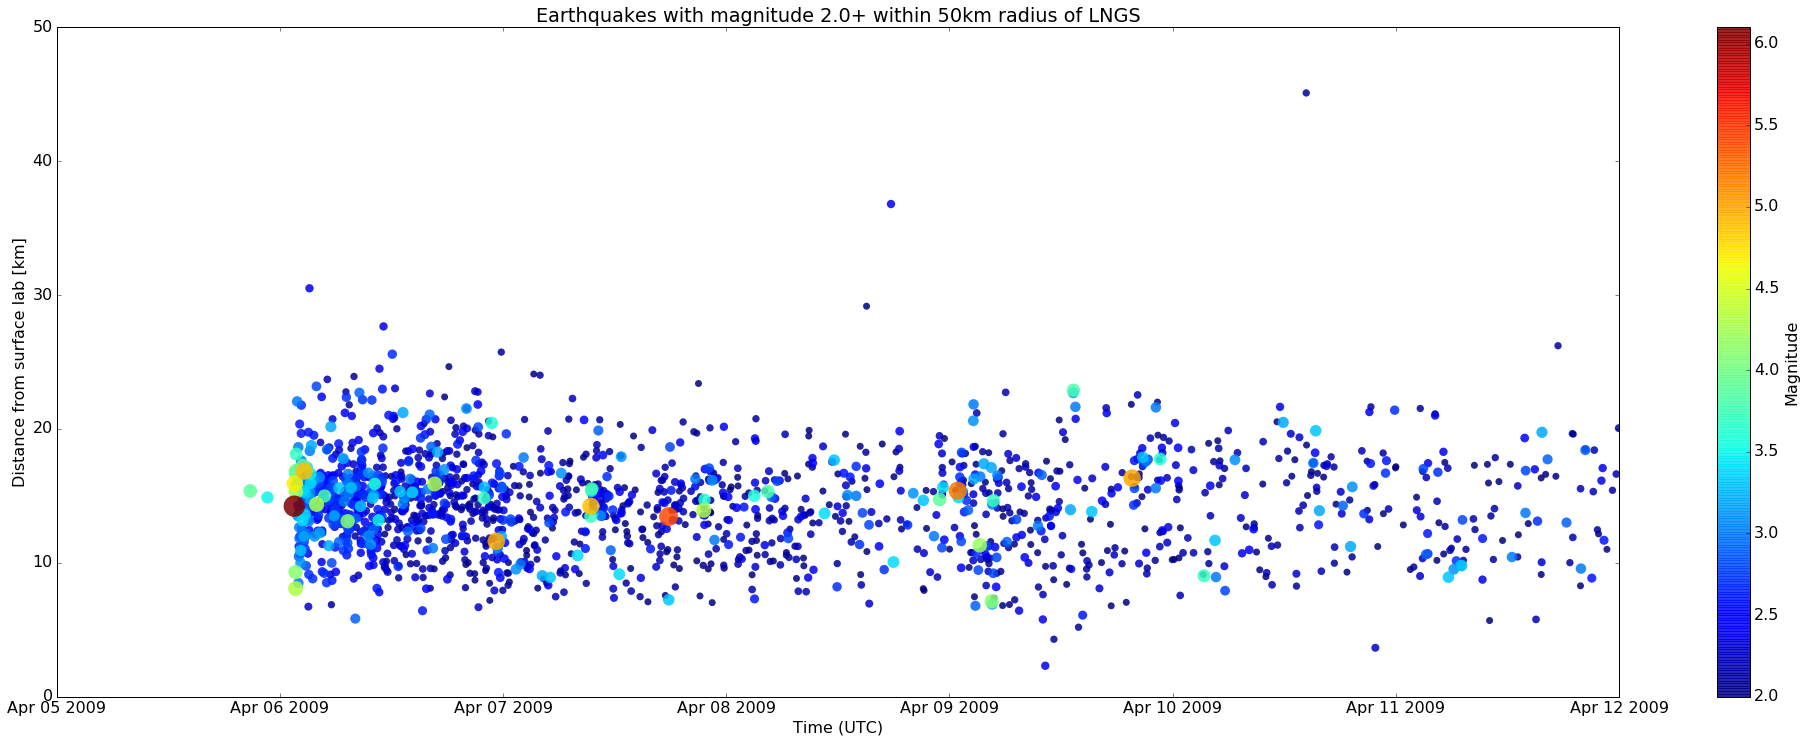

In [9]:
plot_data(data.sort_values('Magnitude'))

# Get Quakes for a given timerange

In [10]:
# The minimum magnitude
min_mag = 2.0

# time range
# start_date
start_date = '2017-01-18T00:00:00'

# end_date 'now'
end_date = pandas.to_datetime('now', utc=True).strftime('%Y-%m-%dT%H:%M:%S')

# The august 2016 earthquake
#start_date = '2016-08-23T00:00:00'
#end_date = '2016-09-07T00:00:00'

# The 2009 earthquake
#start_date = '2009-04-05T00:00:00'
#end_date = '2009-04-12T00:00:00'

# The october 2016 earthquake
#start_date = '2016-10-01T00:00:00'
#end_date = '2016-10-30T00:00:00'


In [11]:
data = quakes.query(start_date, end_date, min_mag=min_mag)

INFO:QuakeQuery:Queried 898 events


In [12]:
data.head()

,#EventID,Latitude,Longitude,Depth/Km,MagType,Magnitude,EventLocationName,DateTime,Timestamp,Distance
0,12693151,42.7942,13.1965,8.9,ML,2.4,Perugia,2017-01-18 02:22:17.530,1484706137,48910.456025
1,12693571,42.6768,13.3055,9.3,ML,2.4,Rieti,2017-01-18 04:35:05.850,1484714105,33123.838590
2,12694181,42.6777,13.1475,10.4,ML,2.3,Rieti,2017-01-18 06:35:24.460,1484721324,41412.640175
3,12695491,42.5468,13.2623,9.2,Mw,5.1,L'Aquila,2017-01-18 09:25:40.380,1484731540,24946.472909
4,12695631,42.6377,13.3138,14.8,ML,3.2,Rieti,2017-01-18 09:30:20.060,1484731820,29104.885443


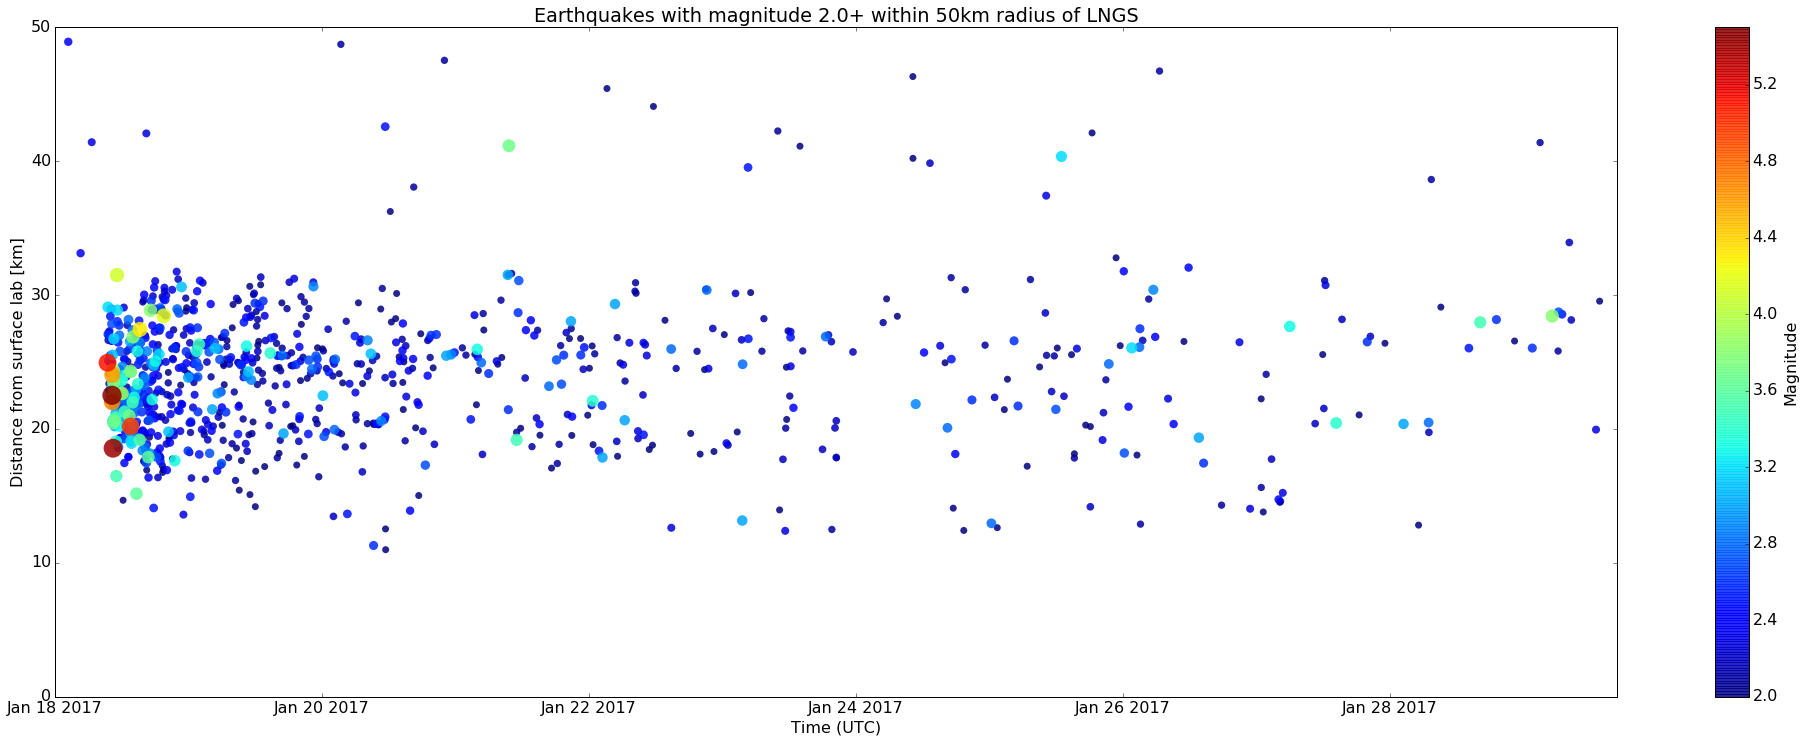

In [13]:
# Sort by magnitude so largest earthquakes are most visible in scatterplot
plot_data(data.sort_values('Magnitude'), save_as="")

In [14]:
# The 10 largest earthquakes by magnitude
data.sort_values('Magnitude', ascending=False).head(10)

,#EventID,Latitude,Longitude,Depth/Km,MagType,Magnitude,EventLocationName,DateTime,Timestamp,Distance
26,12697591,42.5293,13.2823,9.1,Mw,5.5,L'Aquila,2017-01-18 10:14:09.940,1484734449,22514.839237
33,12698071,42.4943,13.3112,8.9,Mw,5.4,L'Aquila,2017-01-18 10:25:23.800,1484735123,18560.986600
3,12695491,42.5468,13.2623,9.2,Mw,5.1,L'Aquila,2017-01-18 09:25:40.380,1484731540,24946.472909
109,12707401,42.4773,13.2807,10.0,Mw,5.0,L'Aquila,2017-01-18 13:33:36.760,1484746416,20194.884031
27,12697641,42.5265,13.2872,9.8,ML,4.7,L'Aquila,2017-01-18 10:15:33.240,1484734533,22009.493583
28,12697681,42.5463,13.2752,10.7,ML,4.6,L'Aquila,2017-01-18 10:16:39.530,1484734599,24042.394456
153,12712641,42.6097,13.2978,10.2,Mw,4.3,Rieti,2017-01-18 15:16:10.290,1484752570,27434.192050
265,12723601,42.5808,13.2430,12.6,Mw,4.2,L'Aquila,2017-01-18 19:32:31.860,1484767951,28448.942847
39,12698591,42.5378,13.2882,11.0,ML,4.1,L'Aquila,2017-01-18 10:39:24.450,1484735964,22628.480356
49,12700101,42.6220,13.2430,10.3,Mw,4.1,Rieti,2017-01-18 11:07:37.240,1484737657,31491.176484


# Plot longitude, latitude

In [15]:
def plot_data_xy(data, save_as=""):
    plt.figure(figsize=(20, 15))
    plt.scatter(data['Longitude'].values,
                data['Latitude'].values,
                s=(3.5 * data['Magnitude'].values)**2,
                c=data['Magnitude'].values, vmin=2, vmax=5,
                lw=0, alpha=0.85)
    p = plt.colorbar()
    
    plt.plot([lab_lon, lab_lon], [lab_lat - 1, lab_lat + 1], 'b--')
    plt.plot([lab_lon - 1, lab_lon + 1], [lab_lat, lab_lat], 'b--', label='LNGS')

    p.set_label('Magnitude')
    plt.ylabel('Latitude [degrees]')
    plt.xlabel('Longitude [degrees]')
    plt.xlim(lab_lon - 0.5, lab_lon + 0.1)
    plt.ylim(lab_lat - 0.2, lab_lat + 0.5)
    plt.title('Earthquakes with magnitude %.1f+ within %dkm radius of LNGS' % (min_mag, event_radius / 1000))

    plt.legend(frameon=False, loc='lower left')
    
    if not save_as == "":
        plt.savefig(save_as, dpi=150)

    plt.show()

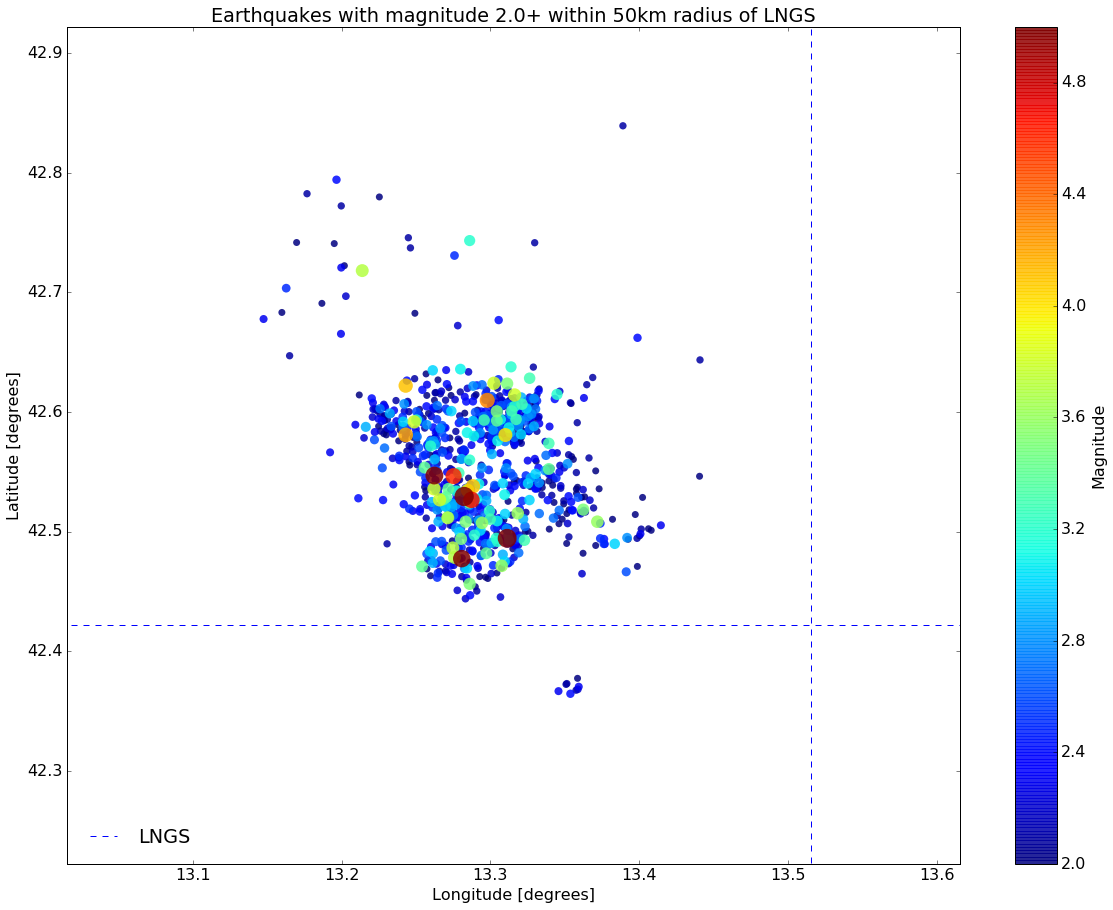

In [16]:
plot_data_xy(data.sort_values('Magnitude'), save_as="")

# Multiple queries
To get around the 10000 event query limit

In [17]:
event_radius = 80000  #m

quakes = QuakeQuery(lab_lat, lab_lon, event_radius, loglevel=logging.WARNING)

In [18]:
# some query options
min_mag = 1.5

# time range
start_date = '2005-01-01T00:00:00'  # earliest possible
now_utc = pandas.to_datetime('now', utc=True).strftime('%Y-%m-%dT%H:%M:%S')

In [19]:
times = pandas.date_range(end=now_utc, periods=140, freq='M').strftime('%Y-%m-%dT%H:%M:%S')
print(times[0], times[-1])

2005-05-31T16:54:58 2016-12-31T16:54:58


In [20]:
data = quakes.query(start_date, times[0], min_mag=min_mag)
for i, time in tqdm(enumerate(times)):
    if i == 0:
        continue    
    tmp_data = quakes.query(times[i-1], time, min_mag=min_mag)
    data = data.append(tmp_data, ignore_index=True)
    
tmp_data = quakes.query(times[-1], now_utc, min_mag=min_mag)
data = data.append(tmp_data, ignore_index=True)

# Save dataframe
So we don't have to query everytime

In [24]:
#with pandas.HDFStore('all_quakes_minmag15_2005_20170129.h5') as store:
#    store['data'] = data

# Plot all quakes since 2005 (magnitude 1.5+)

In [25]:
len(data)

49157

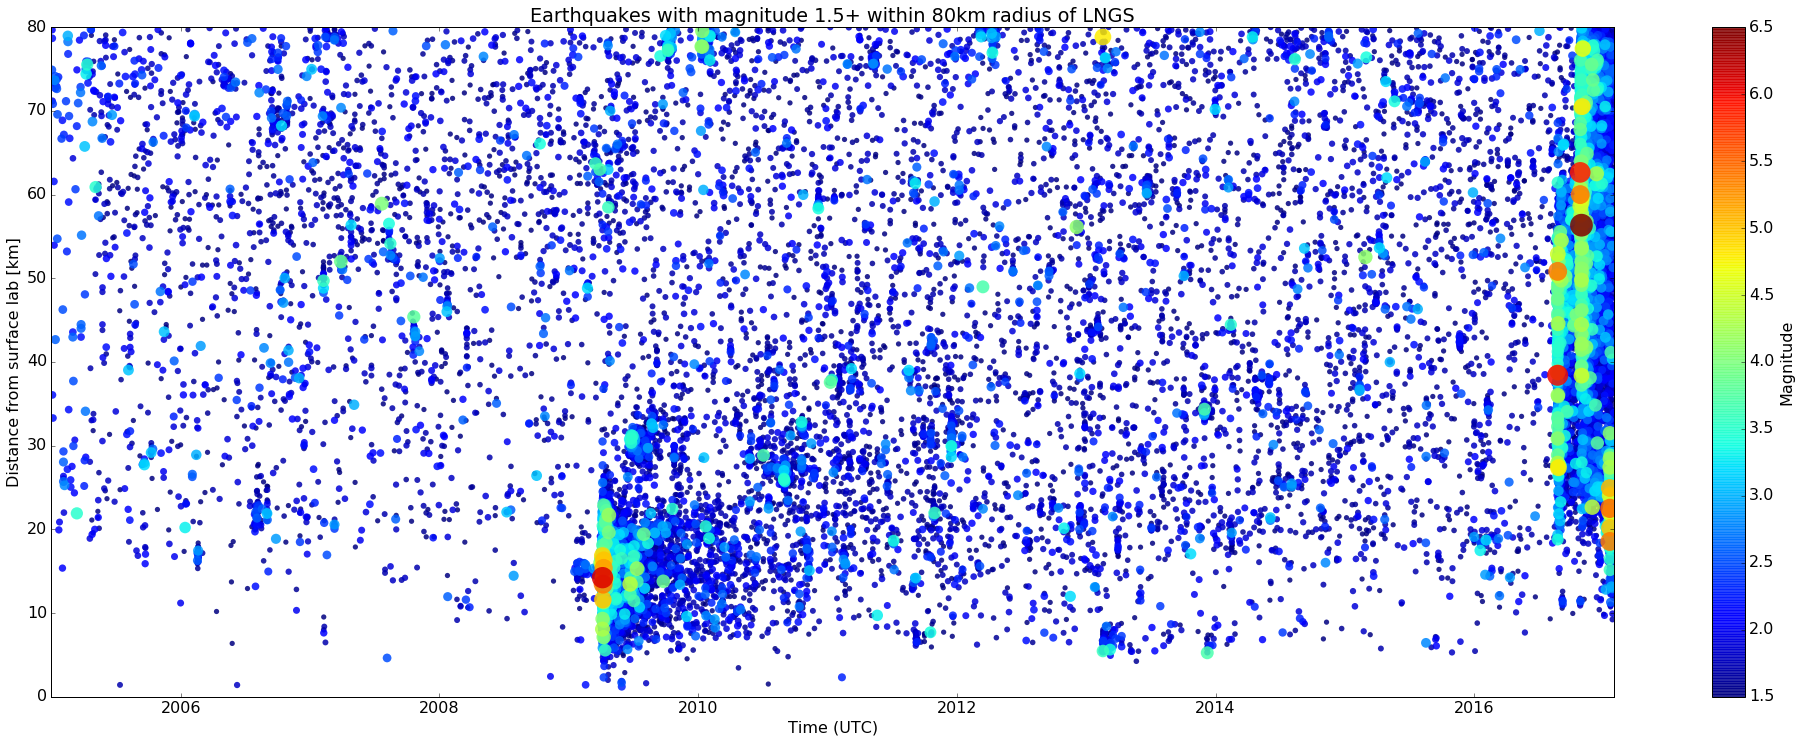

In [26]:
plot_data(data.sort_values('Magnitude'), save_as="all_quakes_minmag15.png")